In [90]:
import pandas as pd

df = pd.read_csv(r"C:/Users/lucas.carillo/Downloads/Salary_dataset.csv")


In [91]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [92]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [94]:
df.drop(["Unnamed: 0"], axis =1, inplace = True)

In [95]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [96]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

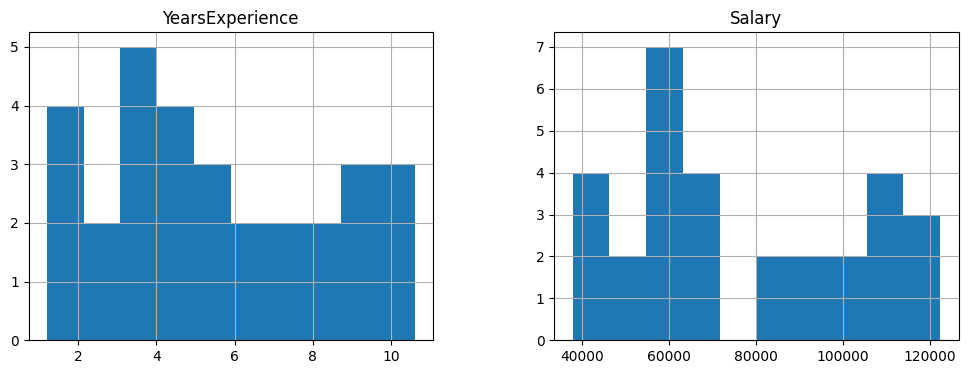

In [97]:
df.hist(figsize=(12,4))

In [98]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [99]:
df.duplicated().sum()

0

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# Selecionando as colunas do DataFrame como uma matriz (DataFrame)
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o transformador de coluna
transformer = make_column_transformer(
    (MinMaxScaler(), ['YearsExperience'])
)

# Ajustando o transformador de coluna aos dados de treinamento e transformando os dados
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.fit_transform(X_test)

# Imprimindo o resultado da transformação antes e depois do MinMaxScaler
print("Antes do MinMaxScaler:")
print(X_train.head())

print("Depois do MinMaxScaler:")
print(X_train_transformed[:5])


Antes do MinMaxScaler:
    YearsExperience
28             10.4
24              8.8
12              4.1
0               1.2
4               2.3
Depois do MinMaxScaler:
[[0.9787234 ]
 [0.80851064]
 [0.30851064]
 [0.        ]
 [0.11702128]]


In [101]:
X_train.shape

(24, 1)

In [102]:
y_train.shape

(24,)

In [103]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [104]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [105]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9024461774180498

<Axes: xlabel='Salary'>

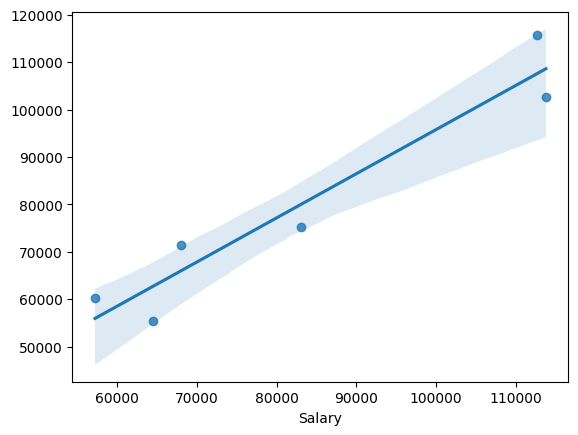

In [106]:
import seaborn as sns
sns.regplot(x= y_test, y = y_pred)